# Lab - Amostragem

Esta tarefa explora a amostragem do sinal contínuo, mudança da taxa de amostragem com decimação e o teorema de Nyquist.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*


In [ ]:
from pylab import *

a) Considerando um sinal senoidal de 100 Hz amostrado a uma taxa de 1000 A/s durante 0,2 s, construa o vetor a. Plote o sinal amostrado (plot) em função de n e seu espectro (stem) em função da frequencia digital w (rad) no eixo horizontal inferior e a frequencia equivalente em Hertz no eixo horizontal superior.

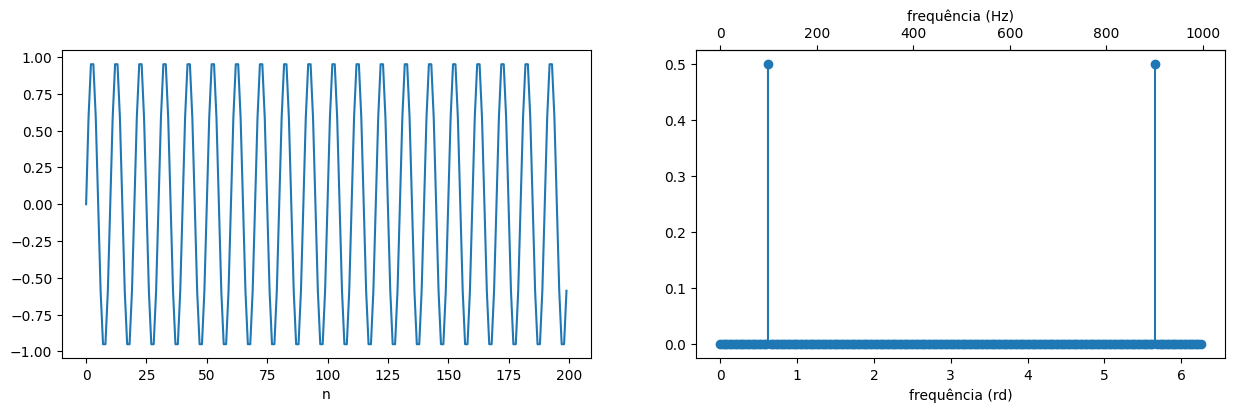

In [48]:
F=100; Fs=1000; T=0.2

N=Fs * T; n=arange(N)
a=sin(2*pi*(F/Fs)*n)

def plotas(x,Fs, Fs2):
    T=0.2
    N=Fs*T
    X=fft(x)
    w=linspace(0,2*pi,num=len(X),endpoint=False)

    figure(figsize=(15,4))
    subplot(1,2,1)
    plot(x)
    xlabel('n')
    ax=subplot(1,2,2)
    stem(w,abs(X)/N,linefmt='C0-',markerfmt='C0o',basefmt='C0-')

    def w2f(x):
       return x * Fs2 / (2*pi)
    def f2w(x):
       return x * 2*pi / Fs2
    ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
    ax2.set_xlabel("frequência (Hz)")
    ax.set_xlabel("frequência (rd)")
    show()


plotas(a,Fs, Fs)

b) Construa o vetor b, considerando um sinal composto pela soma de três senoides: 60, 110, 160 Hz, com amplitudes 3, 2 e 1, amostrado a uma taxa de 1000 A/s durante 0,2 s. Plote o sinal amostrado (plot) e seu espectro (stem).


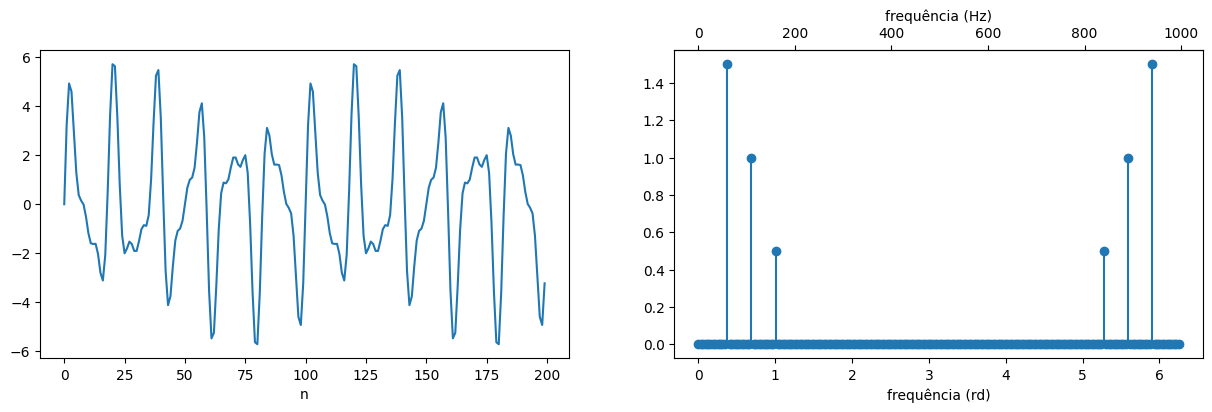

In [49]:
F = list([60, 110, 160]) # lista de frequência das senoides
A = list([3, 2, 1]) # lista de amplitude das senoides
Fs = 1000 # taxa de amostragem
T = 0.2 # período
N = Fs * T # número de amostras = 200
n = arange(N) # vetor de 200 amostras

a1 = A[0]*sin(2*pi*(F[0]/Fs)*n) # senoide de 60Hz com amplitude 3
a2 = A[1]*sin(2*pi*(F[1]/Fs)*n) # senoide de 110Hz com amplitude 2
a3 = A[2]*sin(2*pi*(F[2]/Fs)*n )# senoide de 160Hz com amplitude 1

b = a1 + a2 + a3 # soma das senoides

plotas(b,Fs, Fs)

c) Considere que o sinal do item (b) foi amostrado a 500 A/s. Ou seja, construa o vetor c a partir da decimação do vetor b, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem).


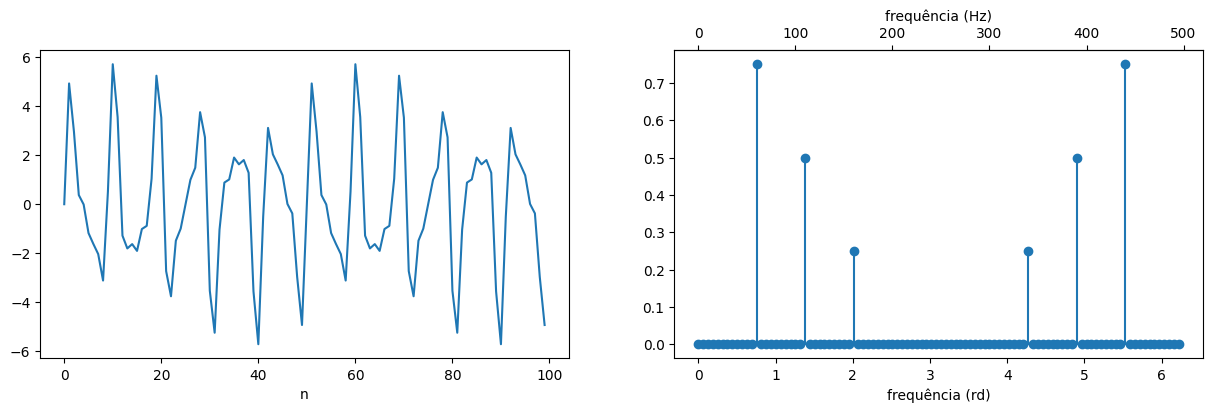

In [50]:
F = list([60, 110, 160])
A = list([3, 2, 1])
Fs = 500 # taxa de amostragem
T = 0.2

N = Fs * T # número de amostras = 100
n = arange(N) # vetor de 100 amostras
a1 = A[0]*sin(2*pi*(F[0]/Fs)*n)
a2 = A[1]*sin(2*pi*(F[1]/Fs)*n)
a3 = A[2]*sin(2*pi*(F[2]/Fs)*n)
c = a1 + a2 + a3

Fs2 = 1000

plotas(c,Fs2, Fs)

d) Considere que o sinal do item (c) foi amostrado a 250 A/s. Ou seja,Construa o vetor d a partir da decimação do vetor c, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem).


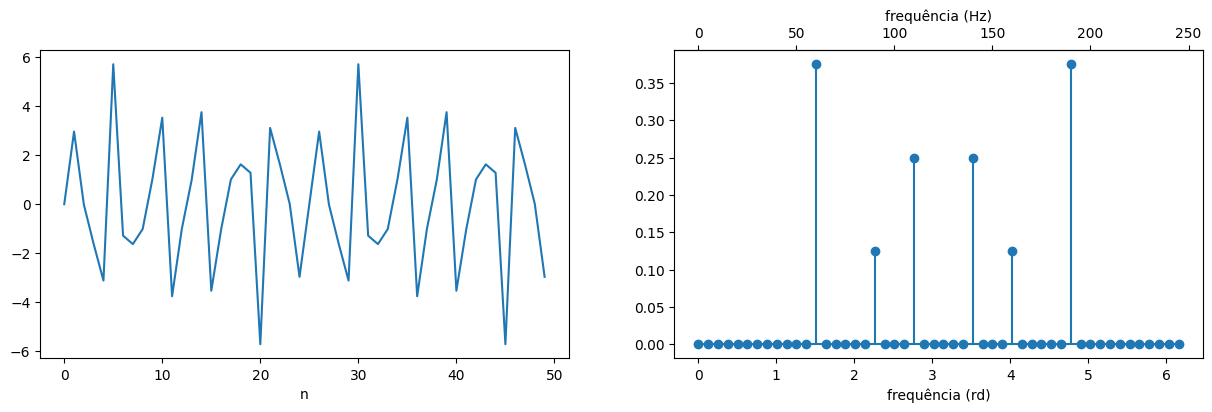

In [51]:
F = list([60, 110, 160])
A = list([3, 2, 1])
Fs = 250 # taxa de amostragem
T = 0.2

N = Fs * T # número de amostras = 50
n = arange(N) # vetor de 50 amostras
a1 = A[0]*sin(2*pi*(F[0]/Fs)*n)
a2 = A[1]*sin(2*pi*(F[1]/Fs)*n)
a3 = A[2]*sin(2*pi*(F[2]/Fs)*n)
d = a1 + a2 + a3

Fs2 = 1000

plotas(d,Fs2, Fs)

e) Considerando que o período de amostragem $T_s = 1 / F_s, F_s = 1000$ A/s foi mantido na reprodução, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequência digital (rad) e da frequência em Hertz.


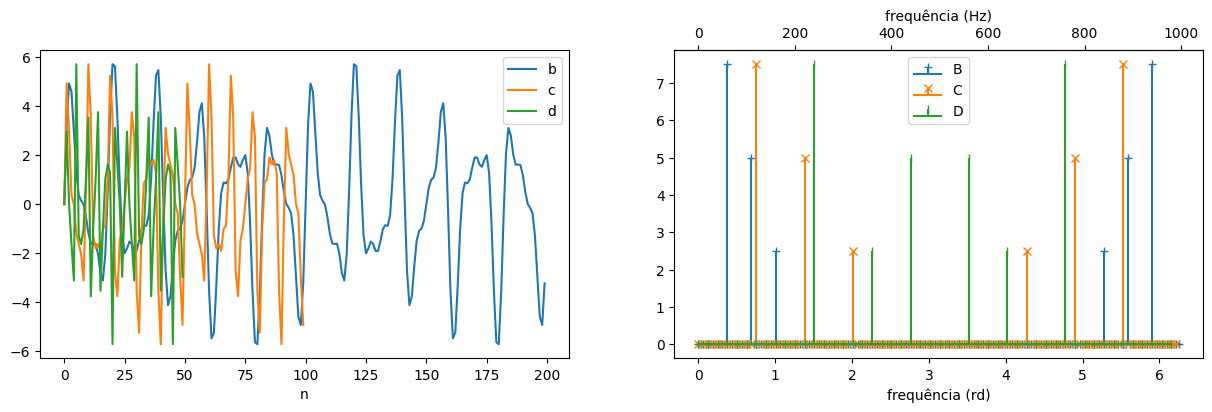

In [52]:
Fs = 1000

def plota3(x1, x2, x3, Fs):
    N1 = 0.2 * len(x1)
    N2 = 0.2 * len(x2)
    N3 = 0.2 * len(x3)
    X1=fft(x1)
    X2=fft(x2)
    X3=fft(x3)
    w1=linspace(0,2*pi,num=len(X1),endpoint=False)
    w2=linspace(0,2*pi,num=len(X2),endpoint=False)
    w3=linspace(0,2*pi,num=len(X3),endpoint=False)

    figure(figsize=(15,4))
    subplot(1,2,1)
    plot(x1,label='b')
    plot(x2,label='c')
    plot(x3,label='d')
    xlabel('n')
    legend()
    ax=subplot(1,2,2)
    stem(w1,abs(X1)/N1,linefmt='C0-',markerfmt='C0+',basefmt='C0-',label='B')
    stem(w2,abs(X2)/N2,linefmt='C1-',markerfmt='C1x',basefmt='C1-',label='C')
    stem(w3,abs(X3)/N3,linefmt='C2-',markerfmt='C2|',basefmt='C2-',label='D')
    legend()

    def w2f(x):
       return x * Fs / (2*pi)
    def f2w(x):
       return x * 2*pi / Fs
    ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
    ax2.set_xlabel("frequência (Hz)")
    ax.set_xlabel("frequência (rd)")
    show()


plota3(b, c, d, Fs)

f) Considerando que o período de amostragem na reprodução foi o mesmo período correspondente da amostragem, para não alterar as frequencias, $T_s = 1 / F_s, F_s = \{1000 , 500, 250 \}$ A/s, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequencia em Hertz, com a frequencia zero no centro, ou seja de -500 a +500 Hz. Dica: usar a função fftshift()

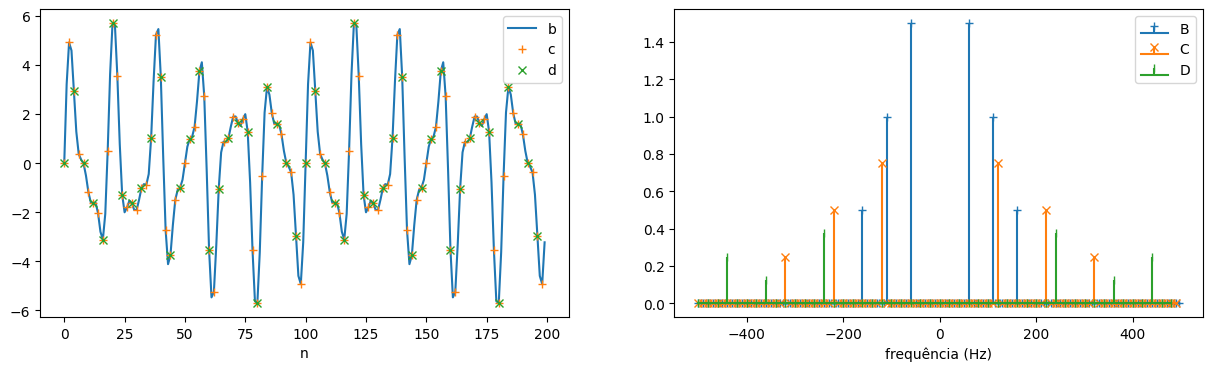

In [53]:
F=list([1000, 500, 250])
Fs=1000; T=0.2

N=Fs * 0.2;
n=arange(N)

# calcula o passo para criar o array de N elementos
# em referência a taxa de amostragem Fs e a taxa de amostragem de cada sinal
step_c = Fs / F[1]
tc = arange(N, step=step_c)

step_d = Fs / F[2]
td = arange(N, step=step_d)

# muda a posição da frequência zero para o centro do espectro
X1=fftshift(fft(b))
X2=fftshift(fft(c))
X3=fftshift(fft(d))

xf1 = fftshift(fftfreq(len(X1), d=1./Fs))
xf2 = fftshift(fftfreq(len(X2), d=1./Fs))
xf3 = fftshift(fftfreq(len(X3), d=1./Fs))

figure(figsize=(15,4))
subplot(1,2,1)
plot(b, label='b')
plot(tc, c, '+', label='c')
plot(td, d, 'x', label='d')
xlabel('n')
legend()
ax=subplot(1,2,2)
stem(xf1,abs(X1)/N,linefmt='C0-',markerfmt='C0+',basefmt='C0-',label='B')
stem(xf2,abs(X2)/N,linefmt='C1-',markerfmt='C1x',basefmt='C1-',label='C')
stem(xf3,abs(X3)/N,linefmt='C2-',markerfmt='C2|',basefmt='C2-',label='D')
legend()
ax.set_xlabel("frequência (Hz)")
show()

g) construa o vetor g, inserindo zeros entre as amostras do vetor c. Plote o sinal (plot) e seu espectro (stem).

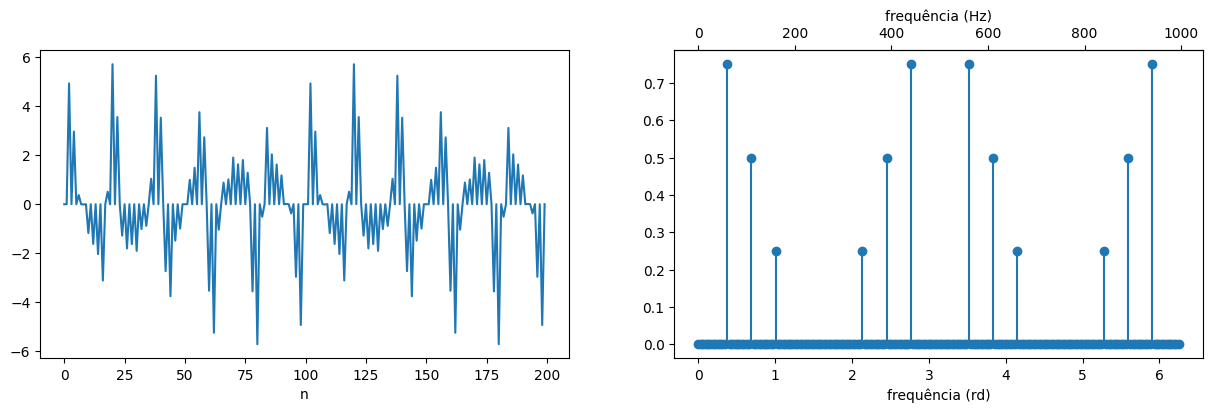

In [54]:
Fs = 1000
pos = 0
nc = list([])
for i in range(200):
    if i % 2 == 0:
        nc.append(c[pos])
        pos = pos + 1
    else:
        nc.append(0)
plotas(nc, Fs, Fs)

h) contrua o vetor h, inserindo três zeros entre as amostras do vetor d. Plote o sinal (plot) e seu espectro (stem).

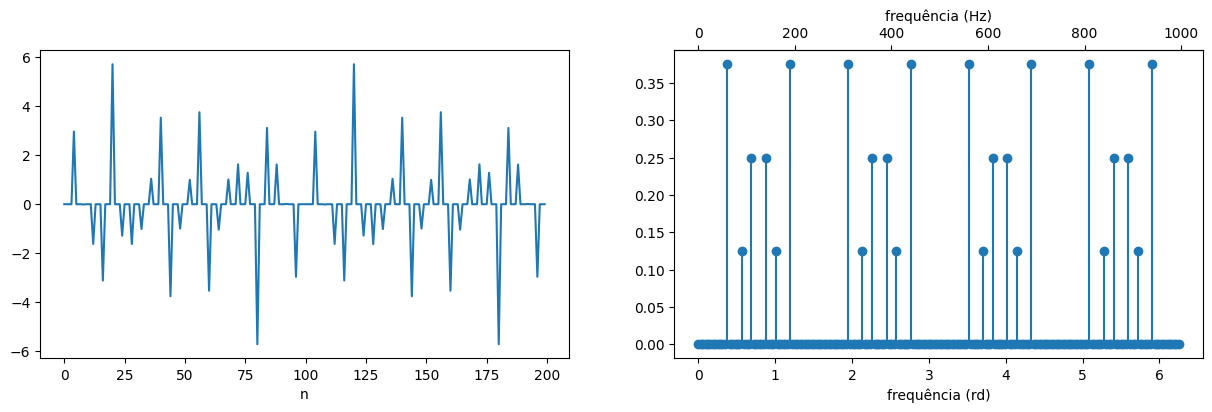

In [55]:
Fs = 1000
pos = 0
nd = list([])
for i in range(200):
    if i % 4 == 0:
        nd.append(d[pos])
        pos = pos + 1
    else:
        nd.append(0)

plotas(nd, Fs, Fs)

i) responda: <br>

1) em que caso(s) aconteceu "aliasing" (c) e/ou (d) ?<br>
<p> (c) </p> <br>

2) que senoide(s) sofreram "aliasing" 60, 110, ou 160 Hz ?<br>
<p> 160 </p> <br>

3) qual a(s) frequencia(s) equivalente em Hertz após o "aliasing" ?<br>
<p> </p> <br>